In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
x, y = np.genfromtxt('./Files/bias_variance_tradeoff.csv', delimiter=',').T
x, y = x.reshape(-1, 1), y.reshape(-1, 1)

x = np.hstack([np.ones(len(x)).reshape(-1, 1), x])

In [3]:
x_norm = x.copy()
def normalize(x):
    return (x - x.mean(axis=0)) / x.std(axis=0)
x_norm[:, 1] = normalize(x_norm[:, 1])

## Divide training, eval and test sets

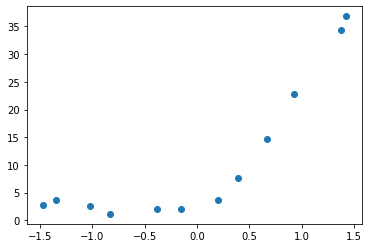

In [4]:
x_train, y_train = x_norm[:12], y[:12]
x_eval, y_eval = x_norm[12:33], y[12:33]

plt.scatter(x_train[:, 1], y_train)
plt.show()

In [5]:
def linear_reg_cost_function(X, Y, θ, λ):
    
    m = len(X)
    a = X @ θ

    regularized = λ * (θ[:,1:] ** 2).sum()
    e = ( ((a - Y) ** 2).sum() + regularized) / (2 * m)
    grad = (X.T @ (a - Y)) / m
    grad[1:] += (λ * θ[1:]) / m

    return e, grad

In [6]:
def train(X, Y, λ=0, lr= 1, iter=100, theta=None):
    m, f = X.shape

    θ = np.random.rand(f).reshape(-1, 1) if theta is None else theta

    errors = np.zeros(iter)
    for i in range(iter):
        errors[i], grad = linear_reg_cost_function(X, Y, θ, λ)
        θ -= lr * grad
    

    return θ, errors

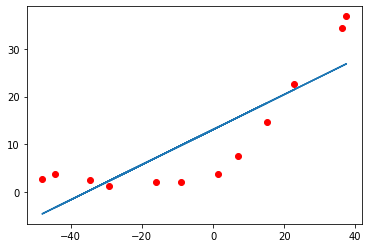

In [7]:
theta, e = train(x_train, y_train)

predic = x_train @ theta

plt.scatter(x[:12, 1], y_train, c='r')
plt.plot(x[:12, 1], predic)
plt.show()

## Learning Curves

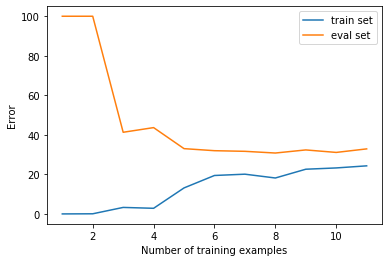

In [8]:
errors = np.zeros([len(x_train), 2])
for i in range(len(x_train)):
    theta, _ = train(x_train[:i], y_train[:i], 0, lr=0.1)
    
    errors[i, 0], _ = linear_reg_cost_function(x_train[:i], y_train[:i], theta, 0)
    errors[i, 1], _ = linear_reg_cost_function(x_eval, y_eval, theta, 0)
errors[errors > 100] = 100

plt.plot(range(len(x_train)), errors)
plt.legend(['train set', 'eval set'])
plt.ylabel('Error')
plt.xlabel('Number of training examples')
plt.show()

## Polinomial Regretion

In [9]:
def poly_features(x, p):
    poli = np.ones([len(x), p+1])
    for i in range(p+1):
        poli[:, i] = x ** i
    return poli

In [10]:
x_poly = poly_features(x[:, 1], 8)

x_train, y_train = x_poly[:12], y[:12]
x_eval, y_eval = x_poly[12:33], y[12:33]
x_test, y_test = x_poly[33:], y[33:]

In [11]:
mu = x_train[:, 1:].mean(axis=0)
sigma = x_train[:, 1:].std(axis=0)

x_train[:,1:] = (x_train[:,1:] - mu)/sigma
x_eval[:,1:] = (x_eval[:,1:] - mu)/sigma
x_test[:,1:] = (x_test[:,1:] - mu)/sigma

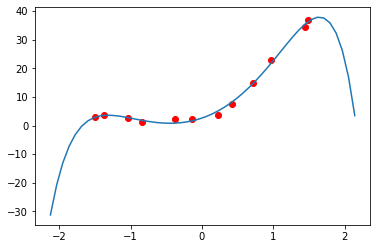

In [12]:
theta, errors = train(x_train, y_train, iter=1000, lr=0.2, λ=0)

x_ej = np.linspace(x.min()-10, x.max()+10)
x_ej = poly_features(x_ej, 8)
x_ej[:,1:] = (x_ej[:, 1:] - mu) / sigma

predic = x_ej @ theta

plt.scatter(x_train[:, 1], y_train, c='r')
plt.plot(x_ej[:, 1], predic)

plt.show()

## With no Regularization. 
gap still is wide between training and validation sets. Moreover training set shows no errors
But if we try with regularrization that gap get closer

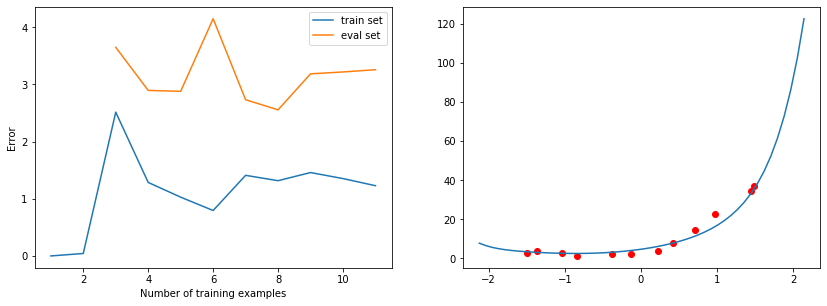

In [13]:
errors = np.zeros([len(x_train), 2])

for i in range(len(x_train)):
    theta, _ = train(x_train[:i], y_train[:i], iter=1500, lr=0.1, λ=1)
    
    errors[i, 0], _ = linear_reg_cost_function(x_train[:i], y_train[:i], theta, 0)
    errors[i, 1], _ = linear_reg_cost_function(x_eval, y_eval, theta, 0)

errors[errors > 100] = None

plt.figure(figsize=[6.4*2.2, 4.8])

plt.subplot(121)
plt.plot(range(len(x_train)), errors)
plt.legend(['train set', 'eval set'])
plt.ylabel('Error')
plt.xlabel('Number of training examples')

#%% Visualize how currve fit the data
plt.subplot(122)
x_ej = np.linspace(x.min()-10, x.max()+10)
x_ej = poly_features(x_ej, 8)
x_ej[:,1:] = (x_ej[:, 1:] - mu) / sigma
predic = x_ej @ theta

plt.scatter(x_train[:, 1], y_train, c='r')
plt.plot(x_ej[:, 1], predic)

plt.show()